In [3]:
# importing dataset
from google.colab import files
uploaded = files.upload()


Saving anxiety_depression_data.csv to anxiety_depression_data (1).csv


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('anxiety_depression_data.csv')

# Basic structure
print(df.shape)
print(df.info())
print(df.head())


(1200, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 no

Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64
Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activi

<Axes: >

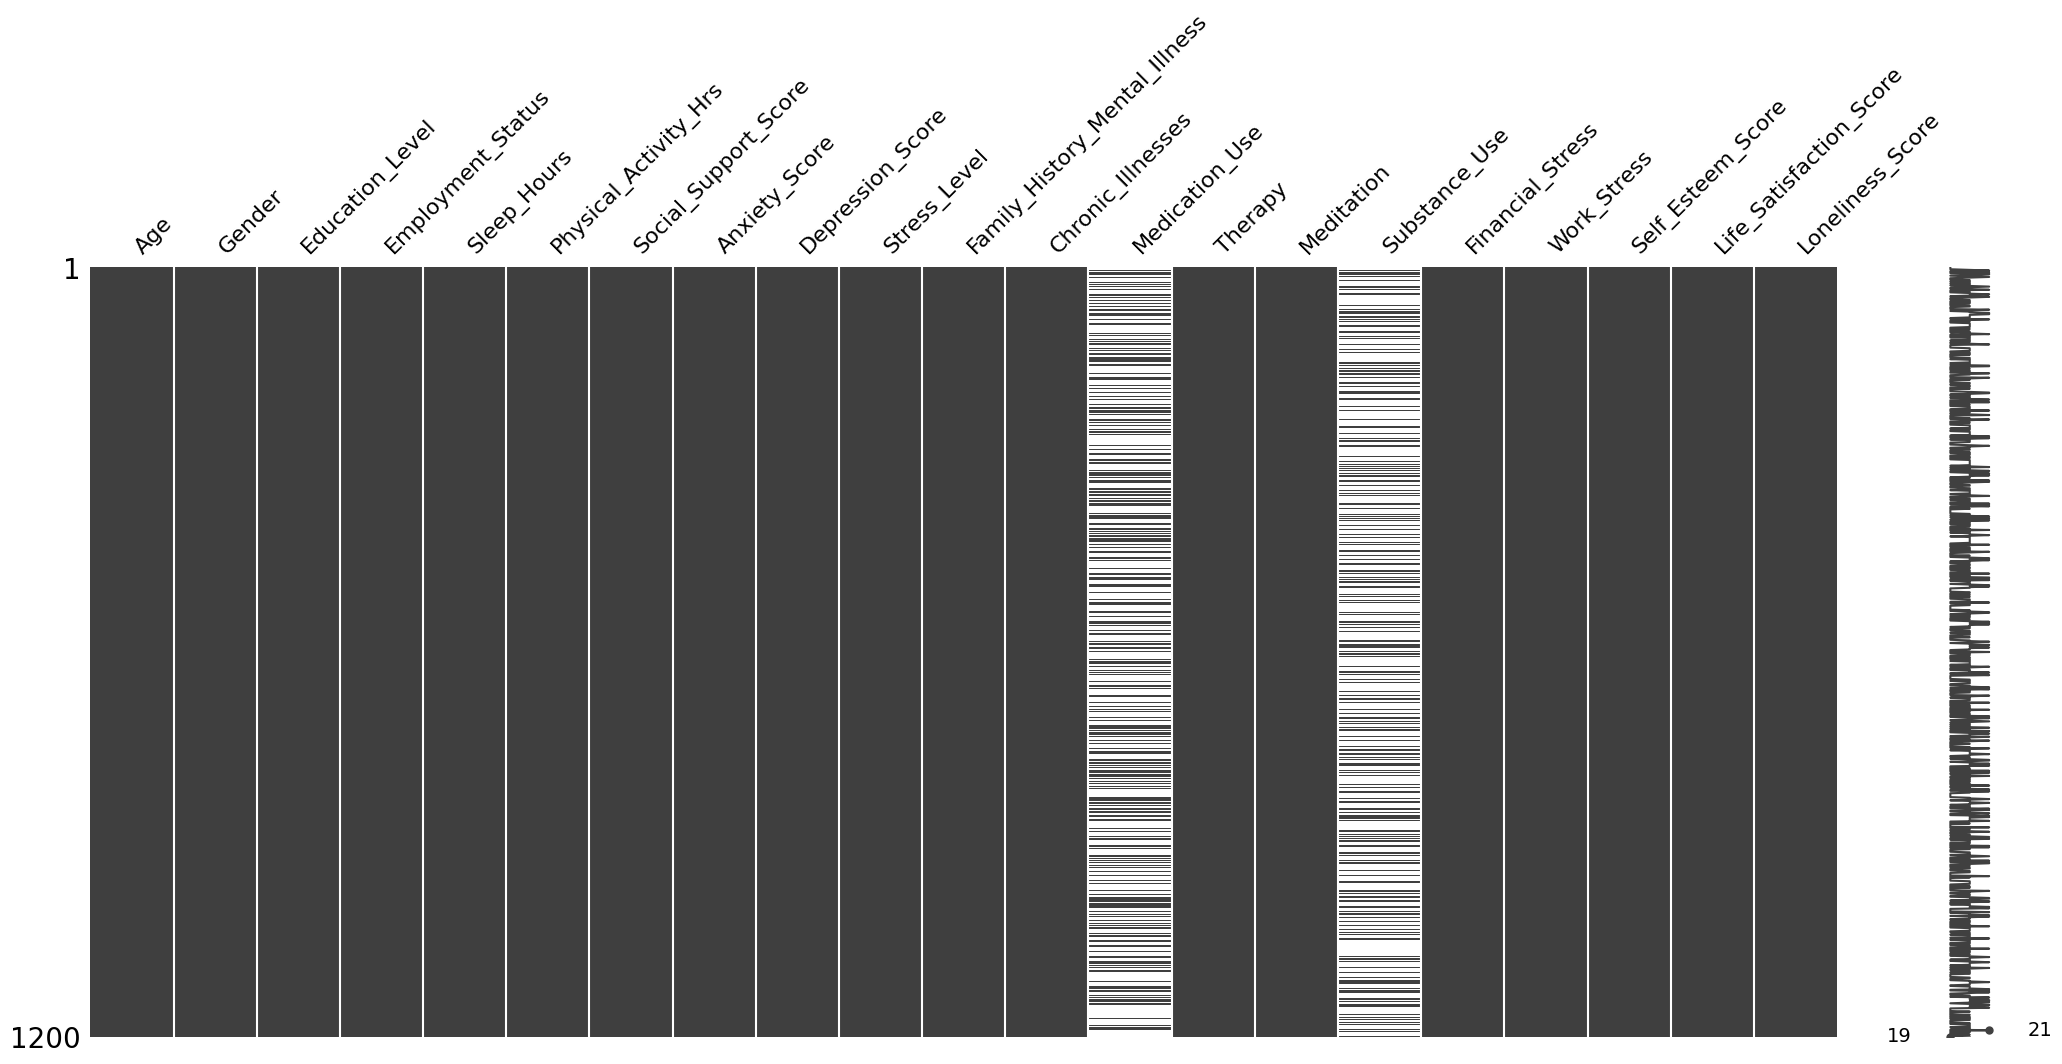

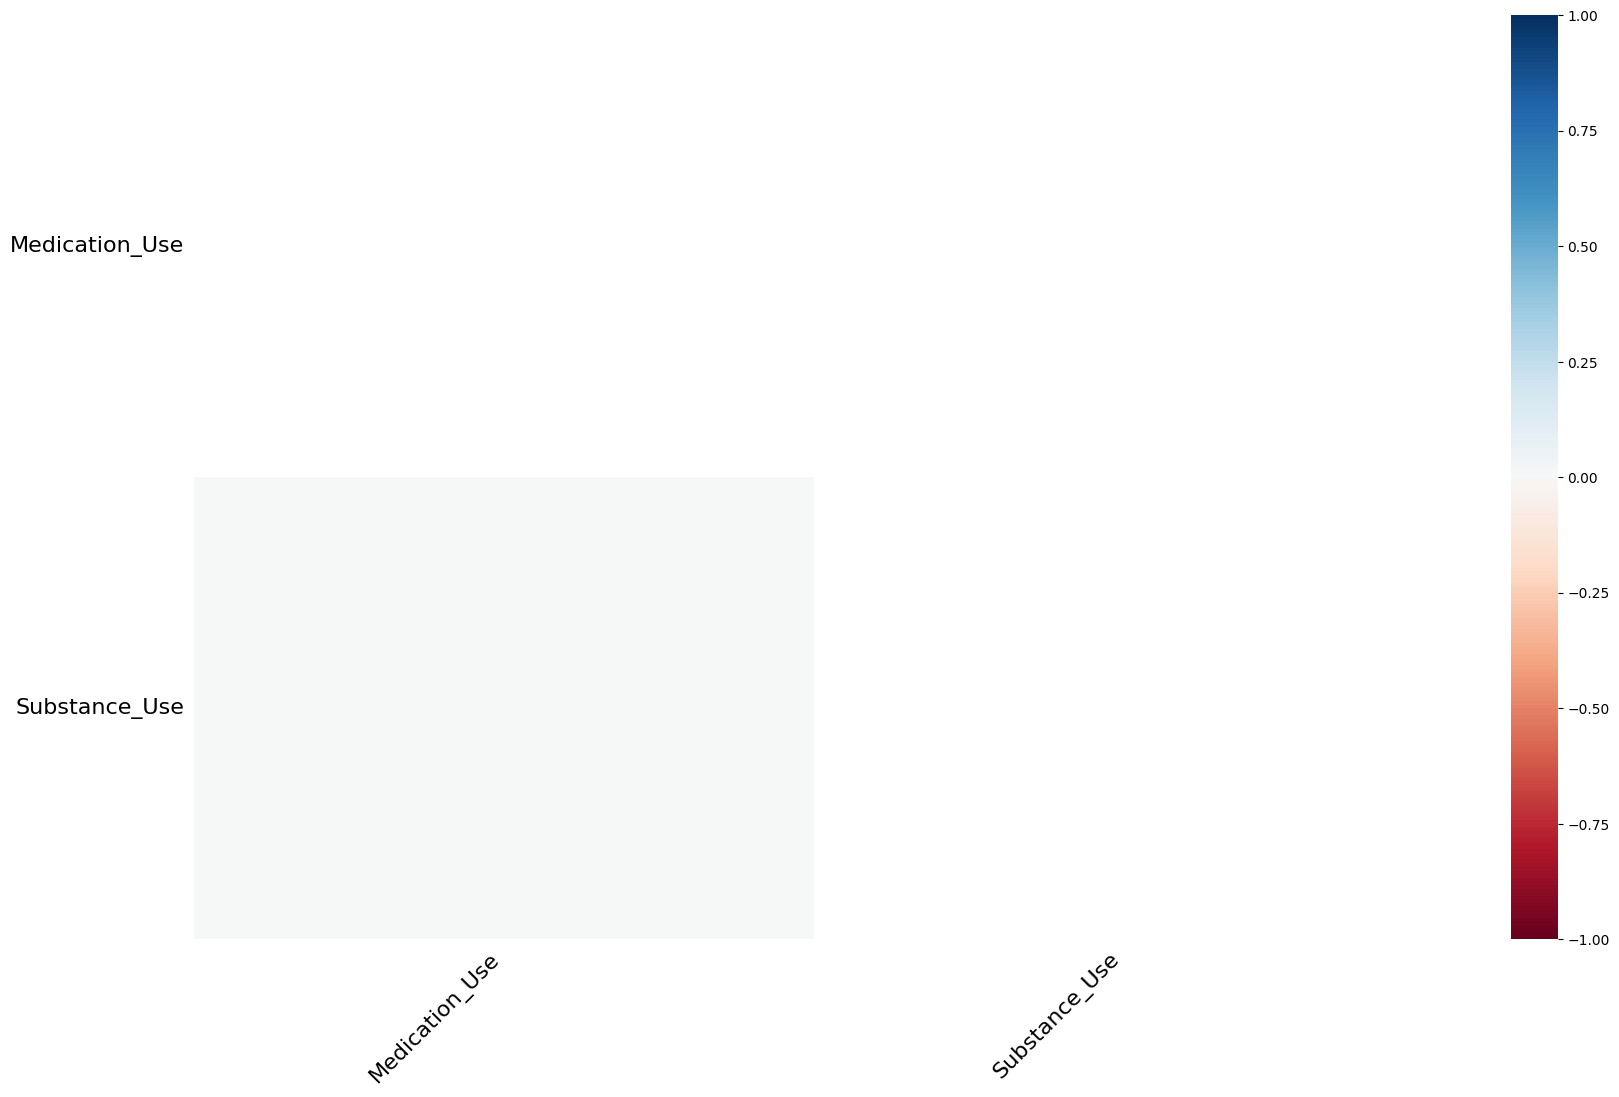

In [9]:
# missing value analysis
print(df.isnull().sum())
print((df.isnull().sum() / len(df) * 100).round(2))

import missingno as msno
msno.matrix(df)
msno.heatmap(df)


In [10]:
# summary statistics
df.describe()
df.describe(include='object')


,Gender,Education_Level,Employment_Status,Medication_Use,Substance_Use
count,1200,1200,1200,453,366
unique,4,5,4,2,2
top,Female,PhD,Employed,Regular,Occasional
freq,569,262,320,238,242


In [11]:
# Unique Value Count per Column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Age: 57 unique values
Gender: 4 unique values
Education_Level: 5 unique values
Employment_Status: 4 unique values
Sleep_Hours: 85 unique values
Physical_Activity_Hrs: 99 unique values
Social_Support_Score: 9 unique values
Anxiety_Score: 20 unique values
Depression_Score: 20 unique values
Stress_Level: 9 unique values
Family_History_Mental_Illness: 2 unique values
Chronic_Illnesses: 2 unique values
Medication_Use: 2 unique values
Therapy: 2 unique values
Meditation: 2 unique values
Substance_Use: 2 unique values
Financial_Stress: 9 unique values
Work_Stress: 9 unique values
Self_Esteem_Score: 9 unique values
Life_Satisfaction_Score: 9 unique values
Loneliness_Score: 9 unique values


In [12]:
# Value Counts for Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(df[col].value_counts(dropna=False))


Gender
Female        569
Male          520
Non-Binary     90
Other          21
Name: count, dtype: int64
Education_Level
PhD            262
High School    242
Master's       242
Other          240
Bachelor's     214
Name: count, dtype: int64
Employment_Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name: count, dtype: int64
Medication_Use
NaN           747
Regular       238
Occasional    215
Name: count, dtype: int64
Substance_Use
NaN           834
Occasional    242
Frequent      124
Name: count, dtype: int64


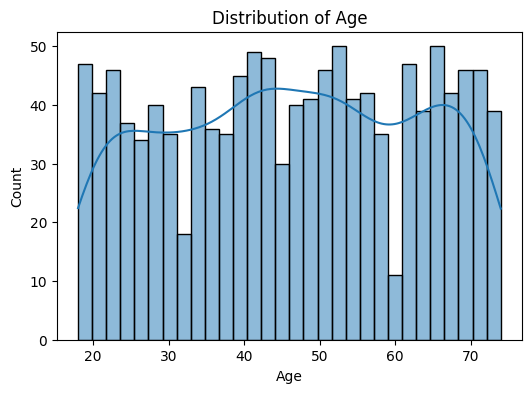

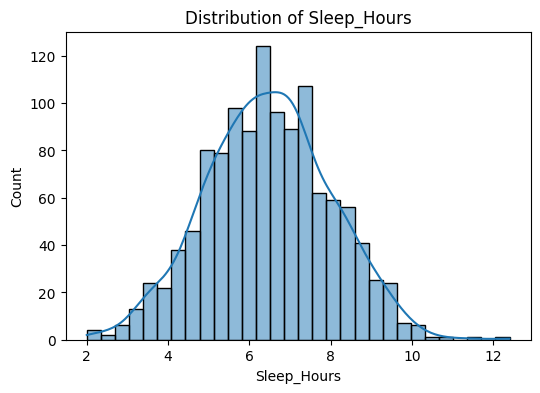

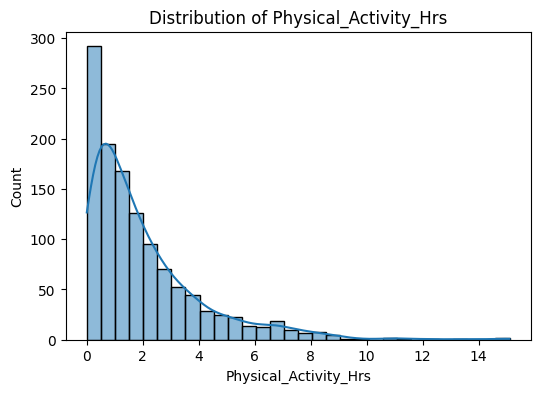

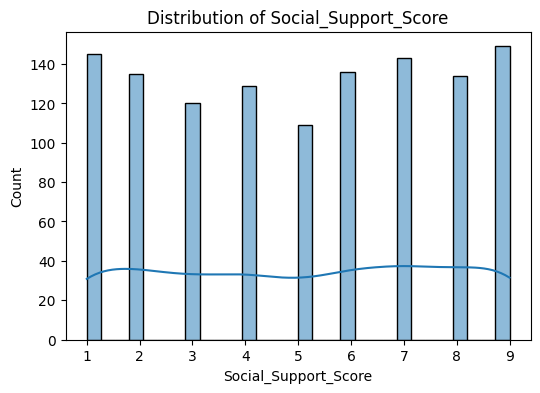

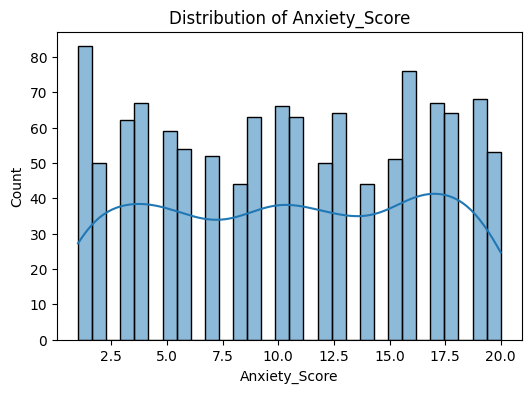

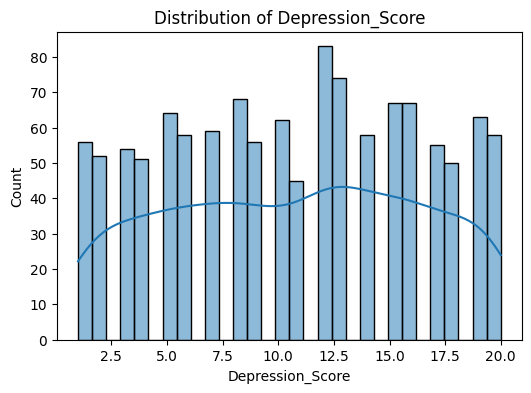

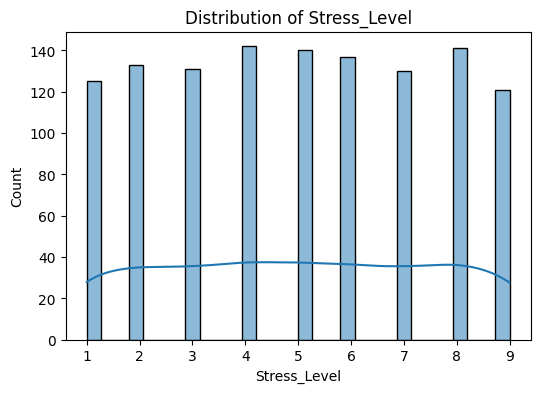

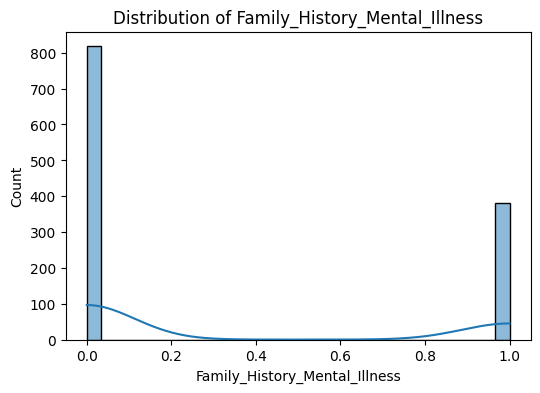

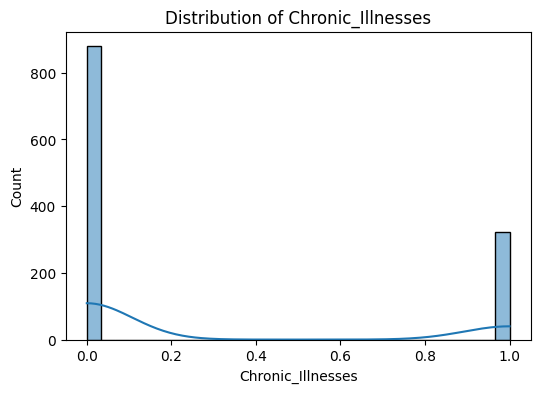

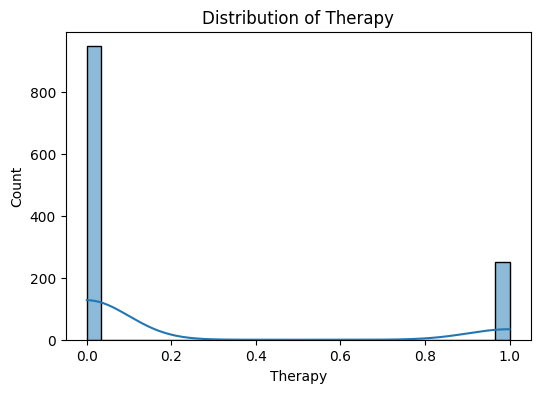

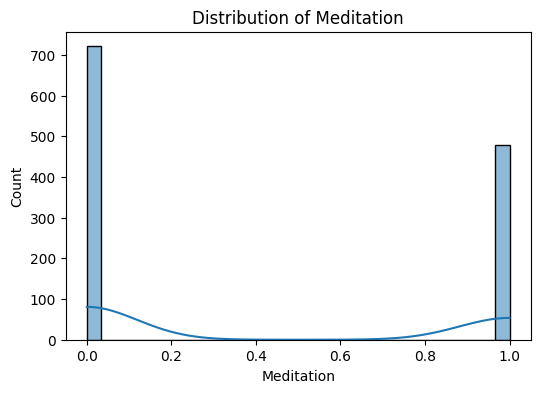

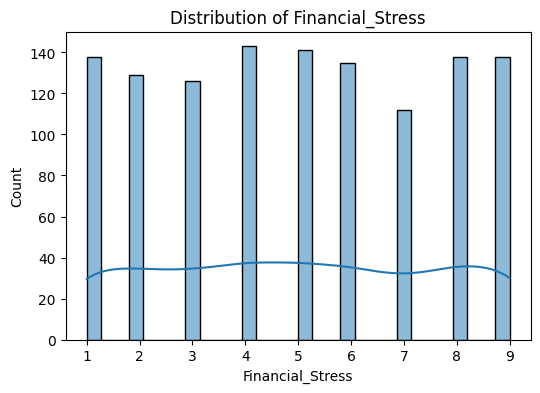

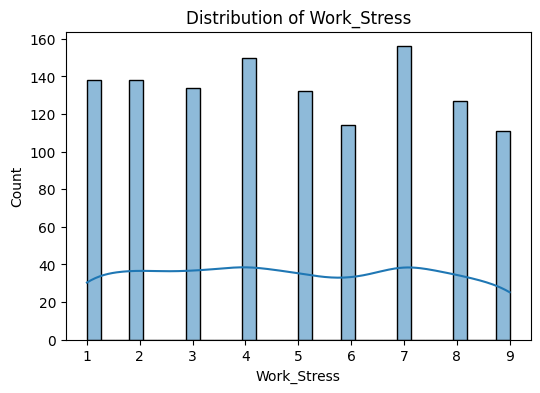

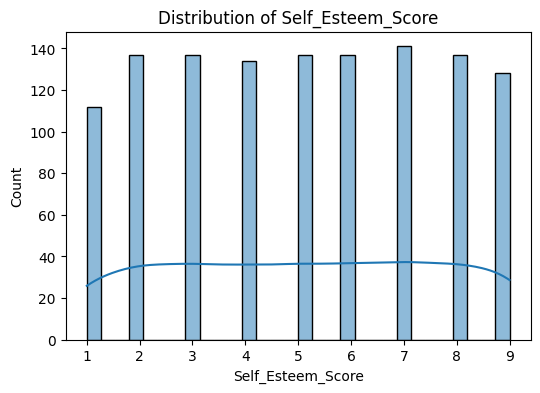

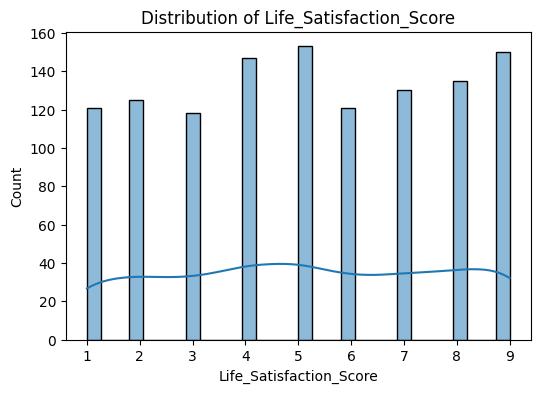

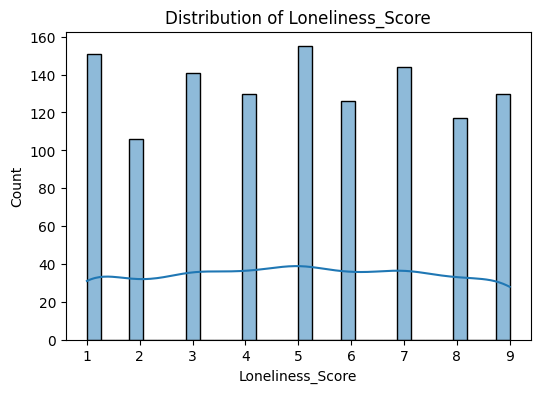

In [13]:
# Distribution Plots (Numerical)
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


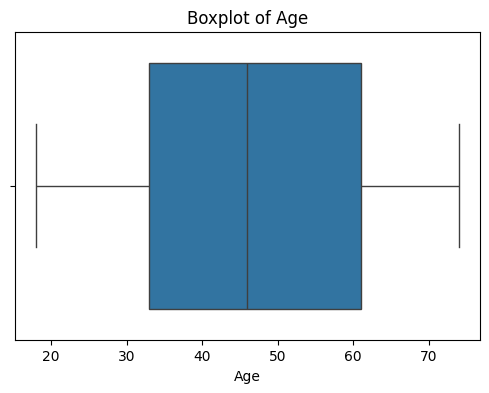

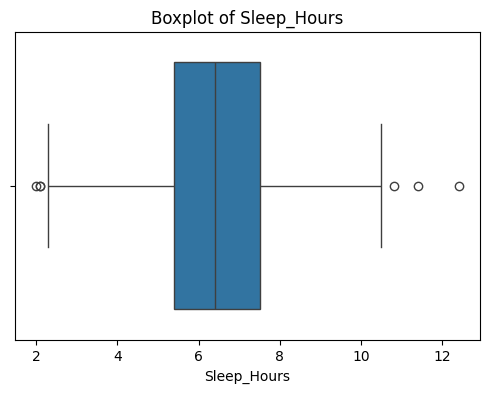

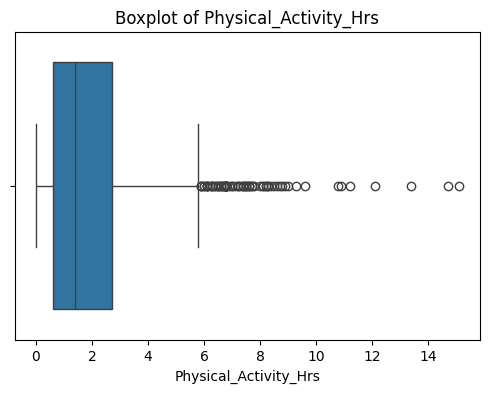

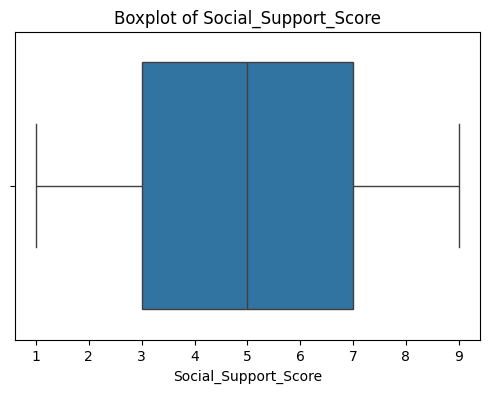

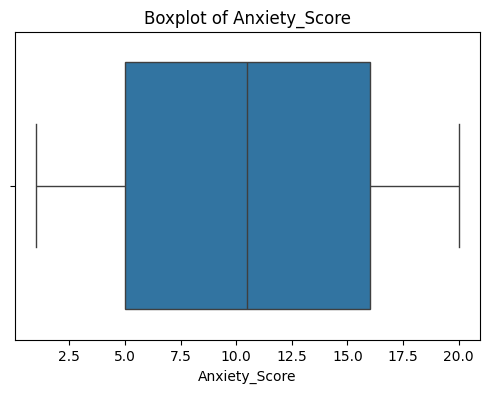

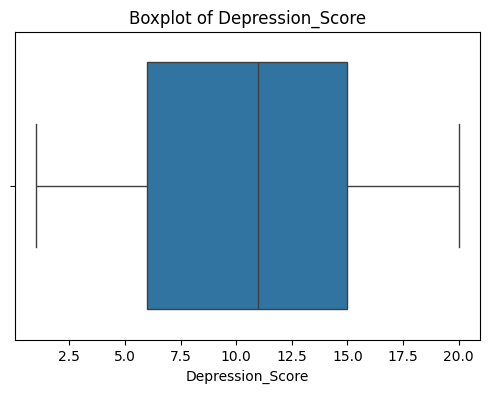

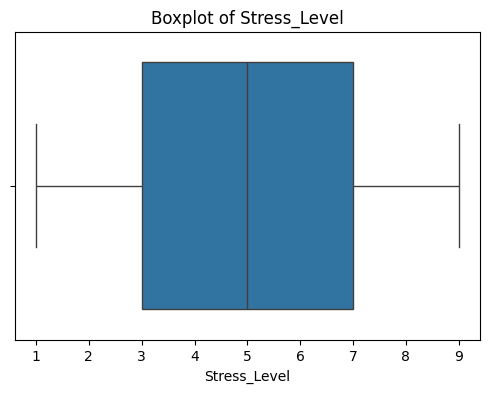

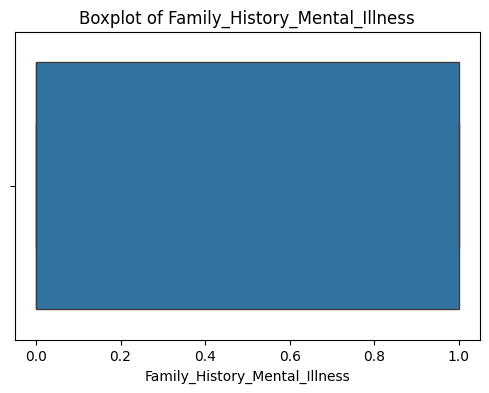

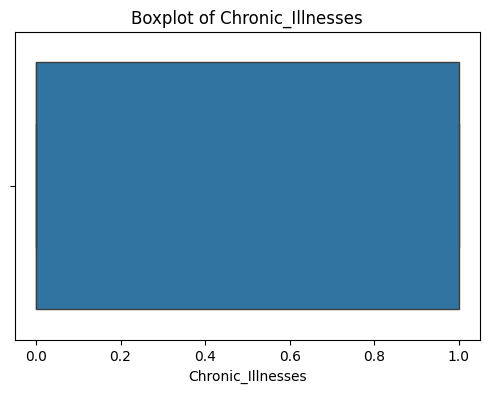

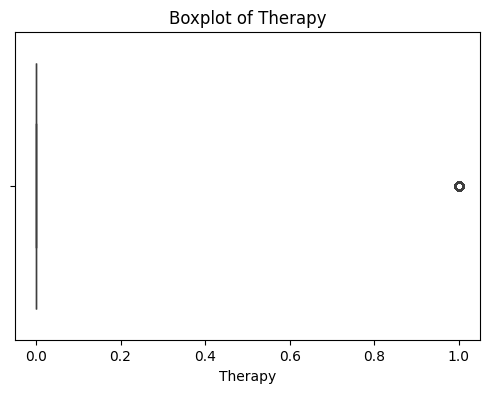

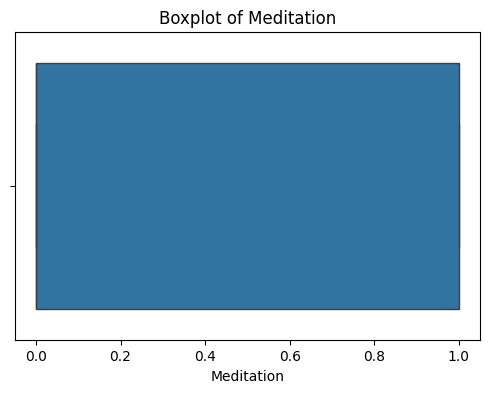

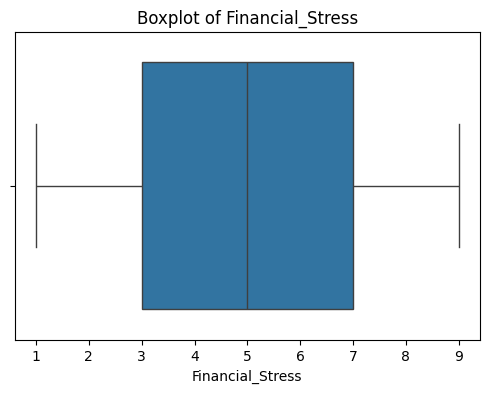

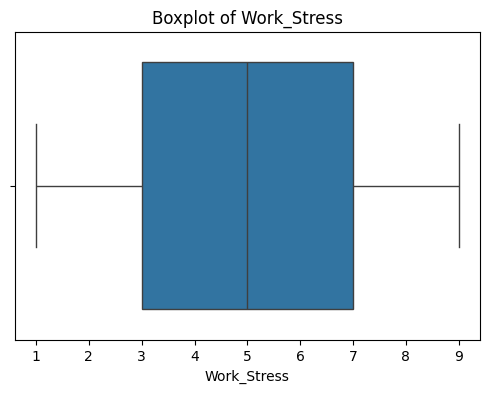

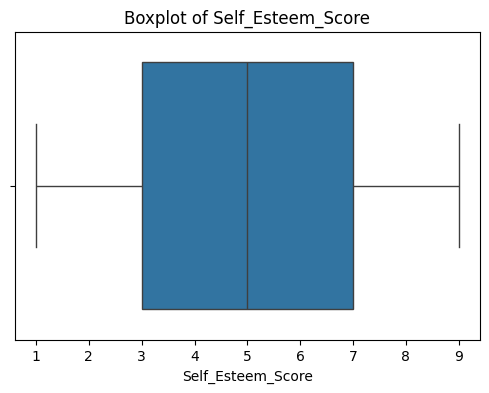

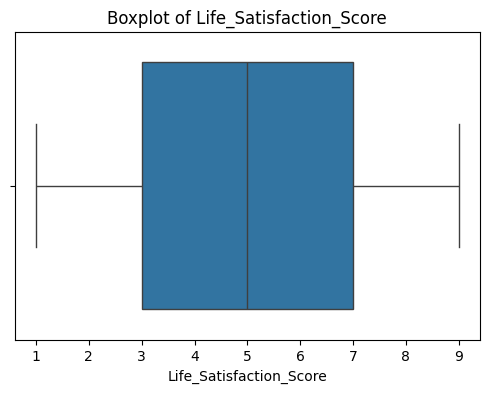

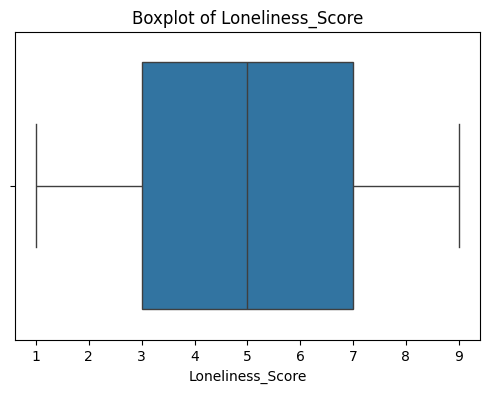

In [14]:
#  Boxplots to Check Outliers
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


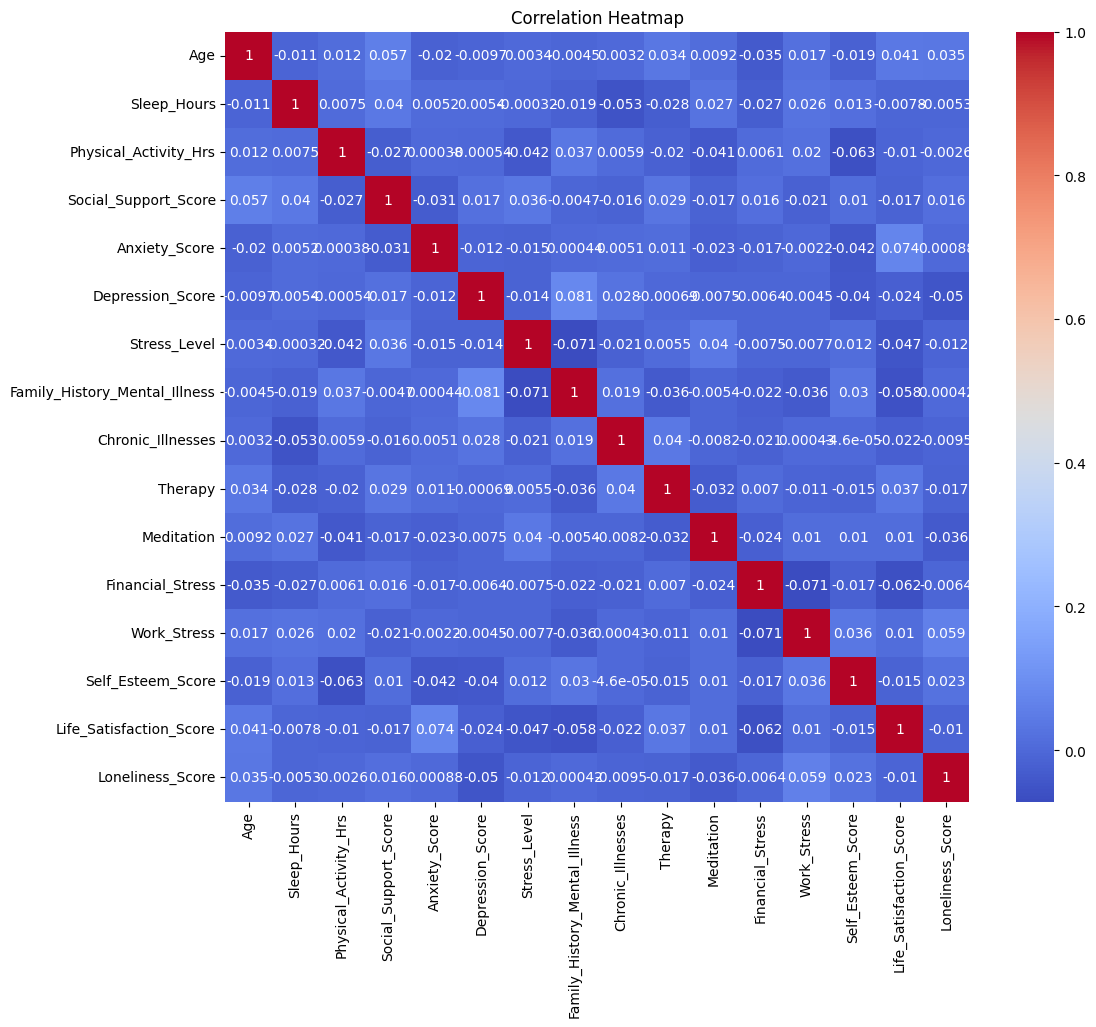

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


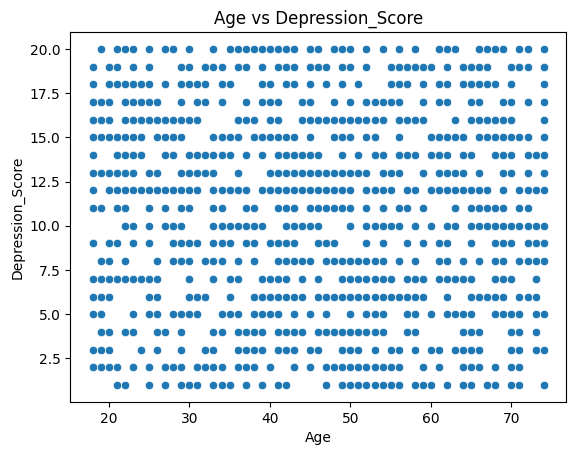

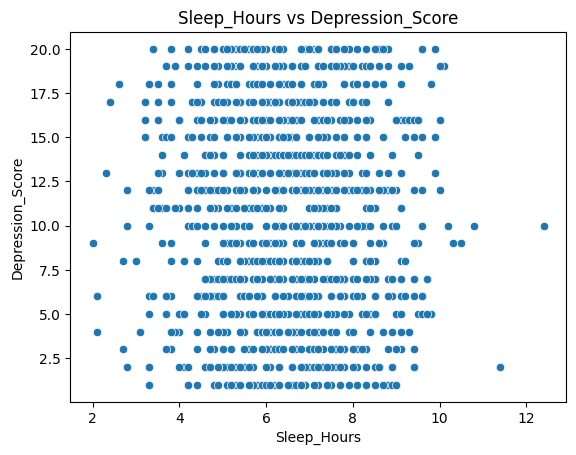

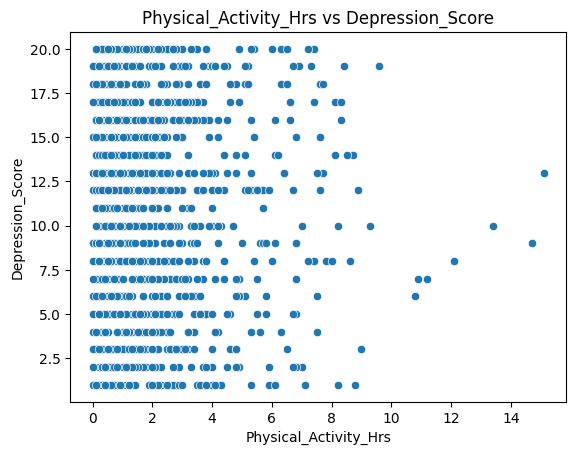

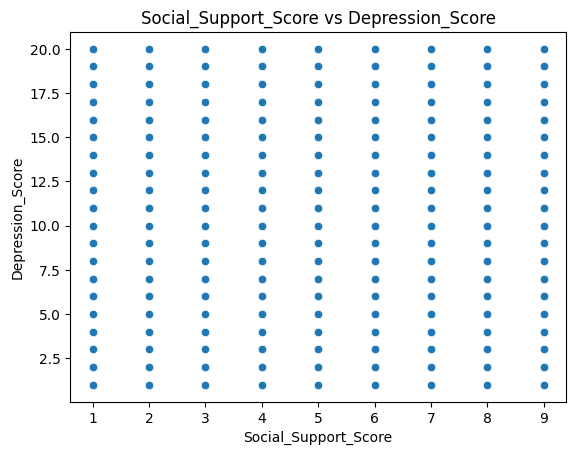

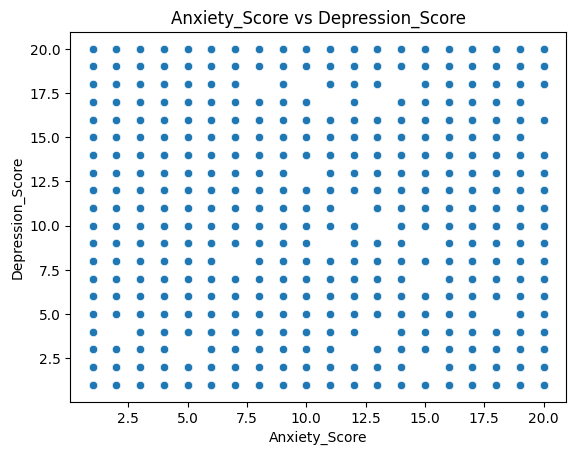

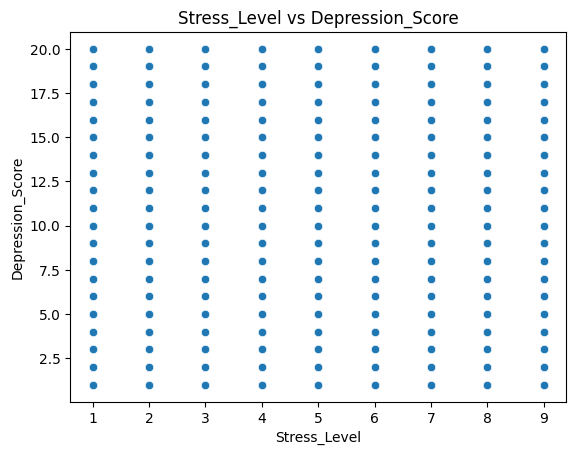

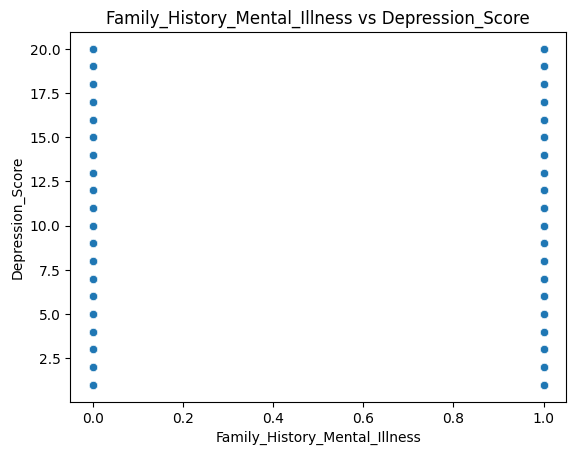

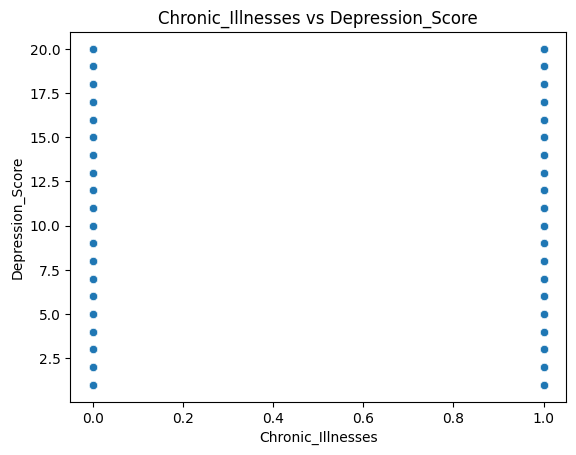

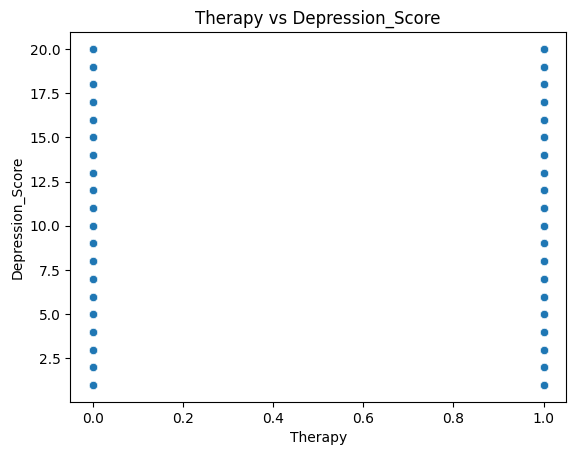

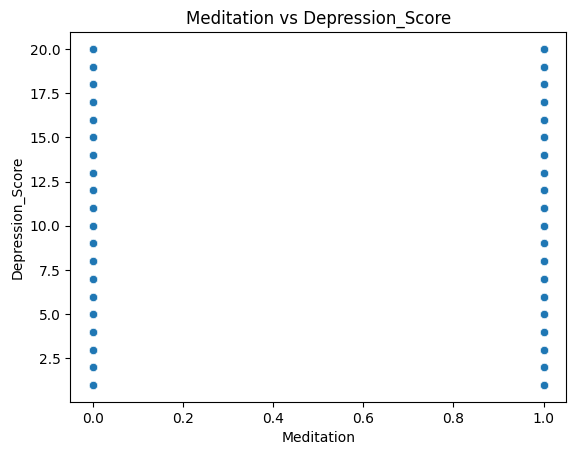

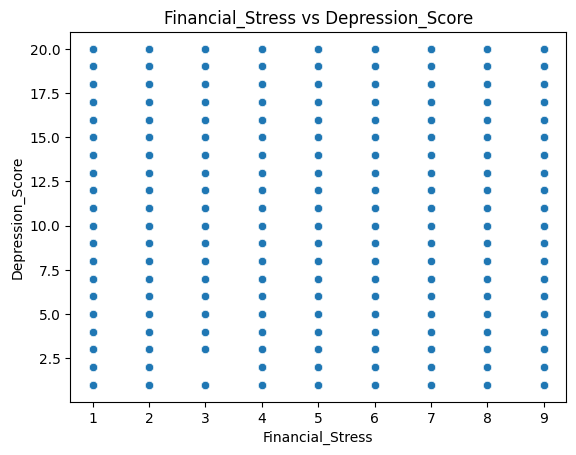

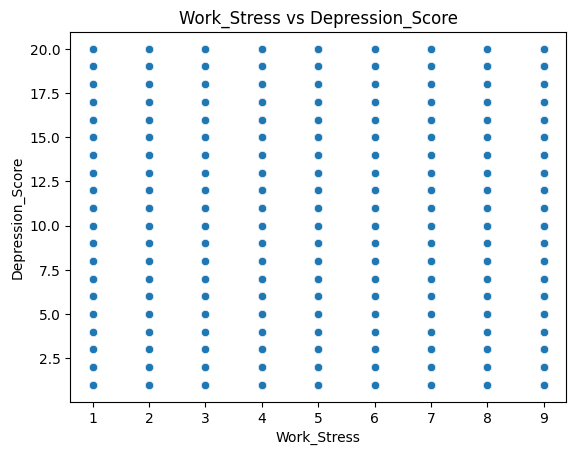

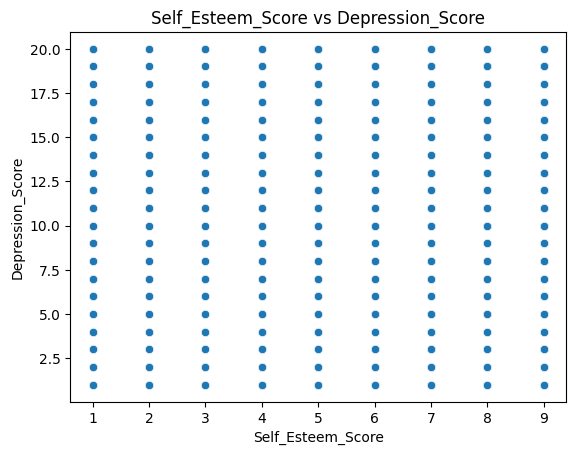

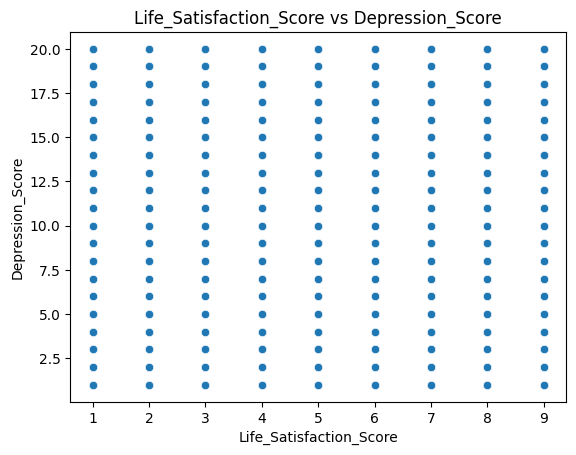

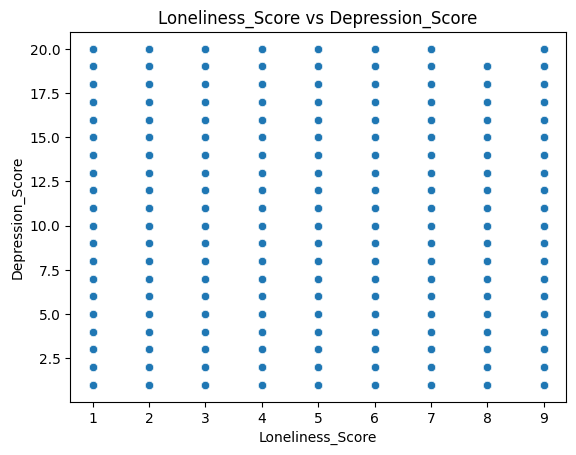

In [16]:
# Target Feature Relationships
# Assuming 'Depression_Score' is the target
for col in num_cols:
    if col != 'Depression_Score':
        sns.scatterplot(x=col, y='Depression_Score', data=df)
        plt.title(f'{col} vs Depression_Score')
        plt.show()


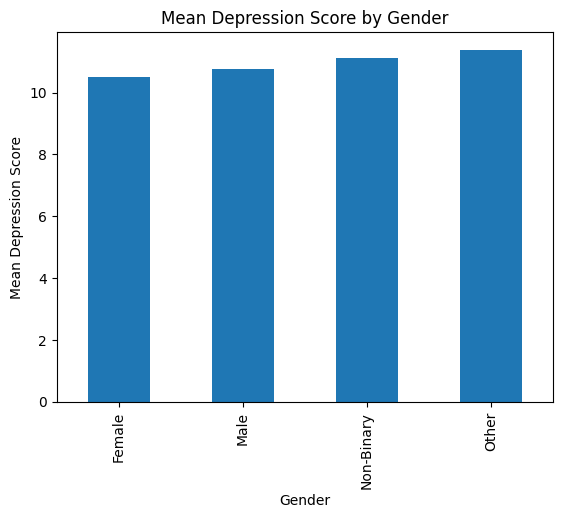

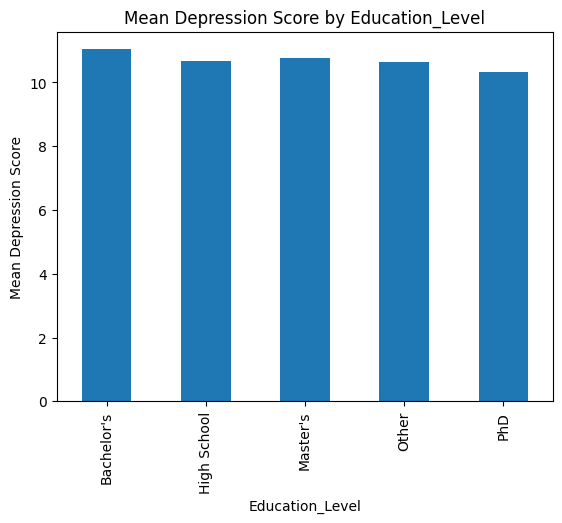

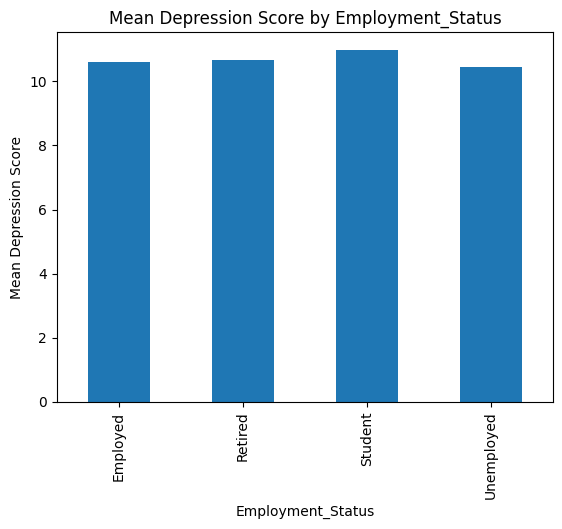

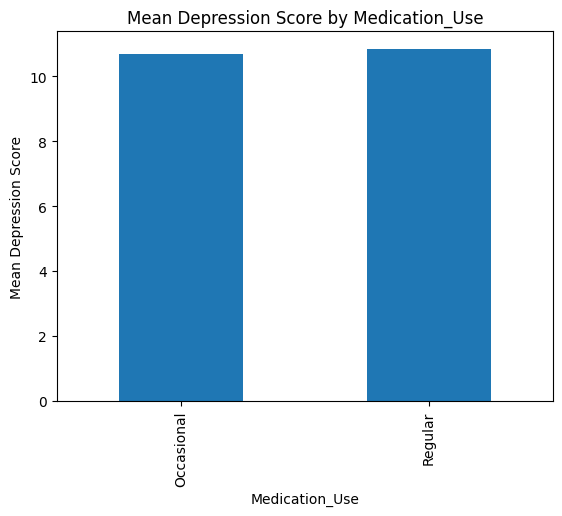

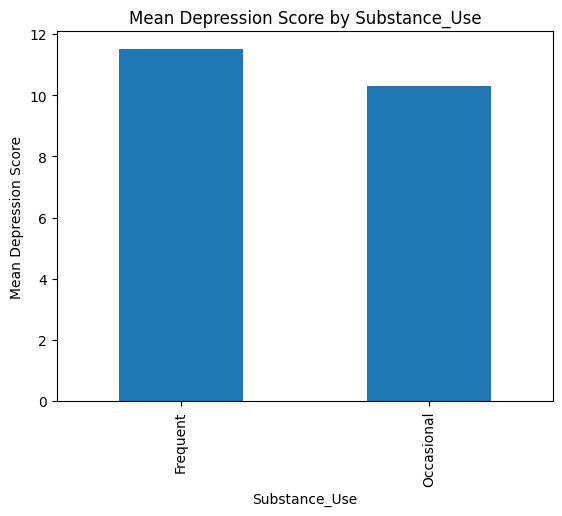

In [17]:
# Grouped Bar Plots (Categorical vs Numeric)
for col in cat_cols:
    if df[col].nunique() < 10:
        df.groupby(col)['Depression_Score'].mean().plot(kind='bar')
        plt.title(f'Mean Depression Score by {col}')
        plt.ylabel('Mean Depression Score')
        plt.show()


In [18]:
# Chi-Square Test for Categorical-Categorical
from scipy.stats import chi2_contingency

def chi_square(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(table)
    return chi2, p

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        chi2, p = chi_square(df, cat_cols[i], cat_cols[j])
        print(f'{cat_cols[i]} vs {cat_cols[j]}: p={p:.4f} {"SIGNIFICANT" if p < 0.05 else ""}')


Gender vs Education_Level: p=0.7521 
Gender vs Employment_Status: p=0.2275 
Gender vs Medication_Use: p=0.0551 
Gender vs Substance_Use: p=0.9673 
Education_Level vs Employment_Status: p=0.1625 
Education_Level vs Medication_Use: p=0.2153 
Education_Level vs Substance_Use: p=0.4430 
Employment_Status vs Medication_Use: p=0.7347 
Employment_Status vs Substance_Use: p=0.3778 
Medication_Use vs Substance_Use: p=1.0000 


In [19]:
#  Skewness of Numerical Features
from scipy.stats import skew
print(df[num_cols].apply(skew).sort_values(ascending=False))


Physical_Activity_Hrs            1.966900
Therapy                          1.423983
Chronic_Illnesses                1.050479
Family_History_Mental_Illness    0.779970
Meditation                       0.411794
Work_Stress                      0.035495
Sleep_Hours                      0.028498
Financial_Stress                 0.014588
Loneliness_Score                -0.002939
Stress_Level                    -0.003689
Self_Esteem_Score               -0.019650
Anxiety_Score                   -0.030590
Life_Satisfaction_Score         -0.032289
Age                             -0.038257
Social_Support_Score            -0.043462
Depression_Score                -0.049223
dtype: float64


In [20]:
# PCA for Feature Reduction (for clustering)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(df[num_cols])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_components[:,0], pca_components[:,1]


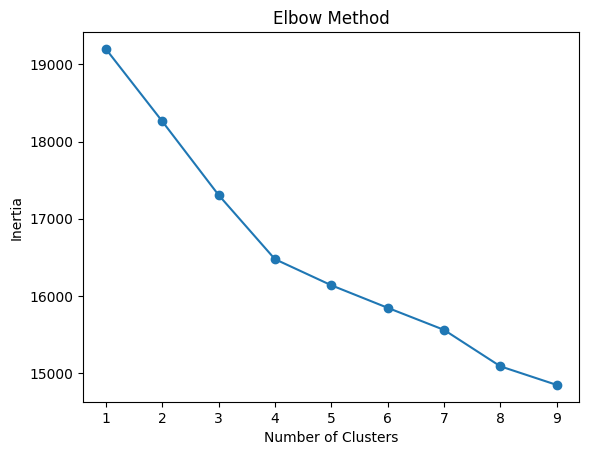

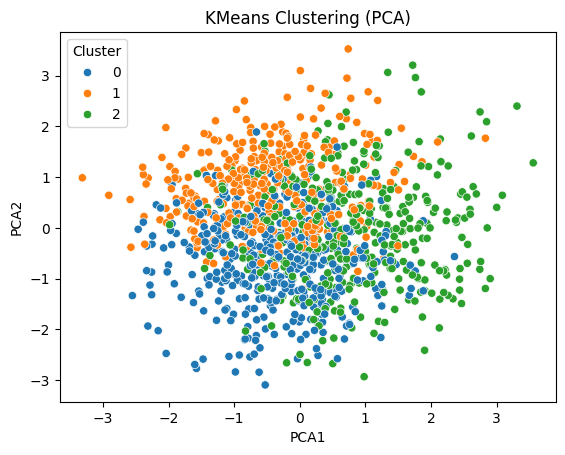

In [21]:
# K-Means Clustering
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans (say k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('KMeans Clustering (PCA)')
plt.show()


In [22]:
# Regression Analysis (Multiple Linear)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df[num_cols].drop(columns=['Depression_Score'], errors='ignore')
y = df['Depression_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: -0.019121168825421586
MSE: 29.17736829116843


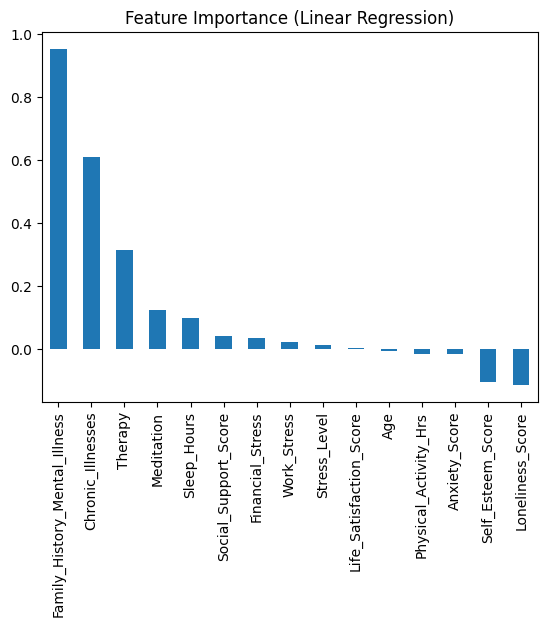

In [23]:
# Feature Importance via Regression Coefficients
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importance (Linear Regression)')
plt.show()
